## 1. Import libraries

In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

## 2. Import most up-to-date data

In [2]:
# Import data

path = r'/Users/berk/Instacart_Grocery_Basket_Analysis'

In [3]:
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'df_ords_prods_custs.pkl'))

In [4]:
df_ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   Unnamed: 0              int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [5]:
df_ords_prods_custs.shape

(32404859, 34)

## 3. Creating Bar Charts

<AxesSubplot:>

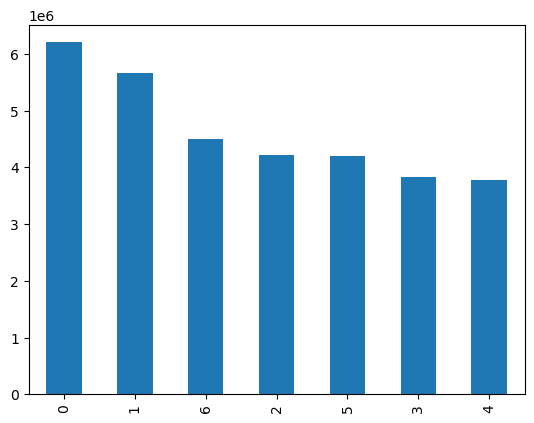

In [6]:
# Create a bar chart of the “orders_day_of_week” column

df_ords_prods_custs['orders_day_of_week'].value_counts().plot.bar()

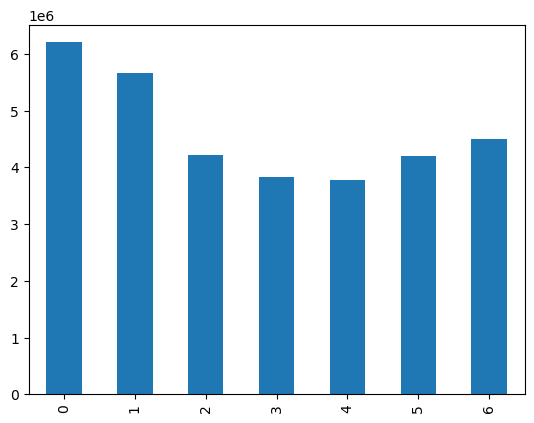

In [7]:
# Additional function sort_index():

bar = df_ords_prods_custs['orders_day_of_week'].value_counts().sort_index().plot.bar()

Text(0.5, 1.0, 'Orders in days of the week')

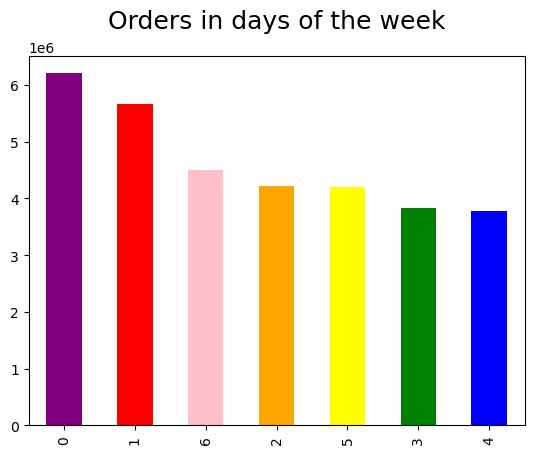

In [8]:
# adding a color

bar_2 = df_ords_prods_custs['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('Orders in days of the week', fontsize = 18, pad=20)

## 4. Creating Histogram

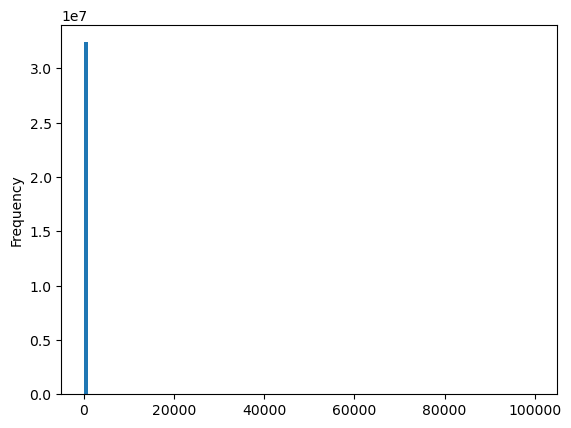

In [9]:
# Create a histogram of the “prices” column

hist = df_ords_prods_custs['prices'].plot.hist(bins = 100)

In [10]:
# Fixing problem with the outliers

df_ords_prods_custs.loc[df_ords_prods_custs['prices'] >100, 'prices'] = np.nan

In [11]:
# Checking the max price 

df_ords_prods_custs['prices'].max()

25.0

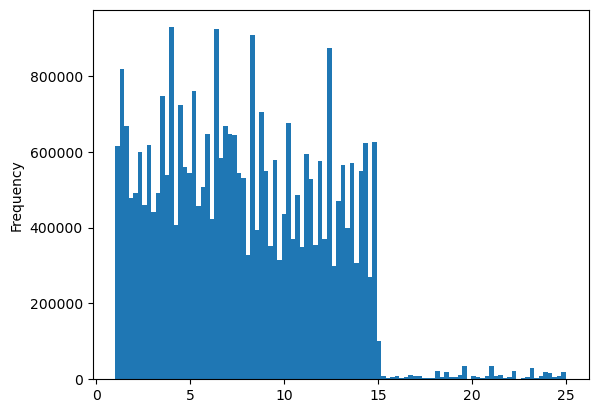

In [12]:
hist_2 = df_ords_prods_custs['prices'].plot.hist(bins = 100)

## 5. Creating Scatterplot

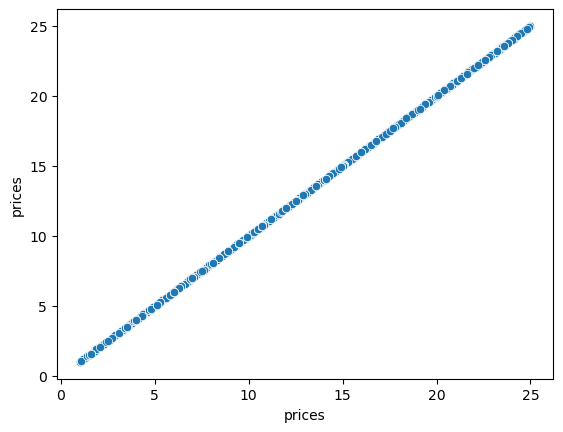

In [13]:
# Create a scatterplot of the “prices” column 
# which is included in the seaborn library (imported into your notebook as sns)

scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_custs)

## 6. Creating Line Charts with Sampling Data

In [14]:
np.random.seed(4)

In [15]:
# Create a List holding True/False values to the test np.random.rant () <= 0.7

dev = np.random.rand(len(df_ords_prods_custs)) <= 0.7

In [16]:
dev 

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# Store 70% of the sample in the dataframe big

big = df_ords_prods_custs[dev]

In [18]:
# Store 30% of the sample in the dataframe small

small = df_ords_prods_custs[~dev]

In [19]:
len(df_ords_prods_custs)

32404859

In [20]:
len(big) + len (small)

32404859

In [21]:
df_2 = small[['orders_day_of_week','prices']]

Text(0.5, 1.0, 'Spending habits in days of the week')

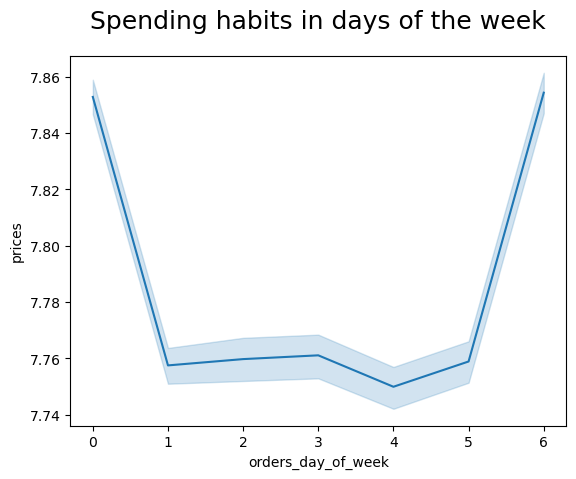

In [22]:
# Create your line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
plt.title('Spending habits in days of the week', fontsize = 18, pad=20)

## 7. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0.5, 1.0, 'Orders in hours of the day')

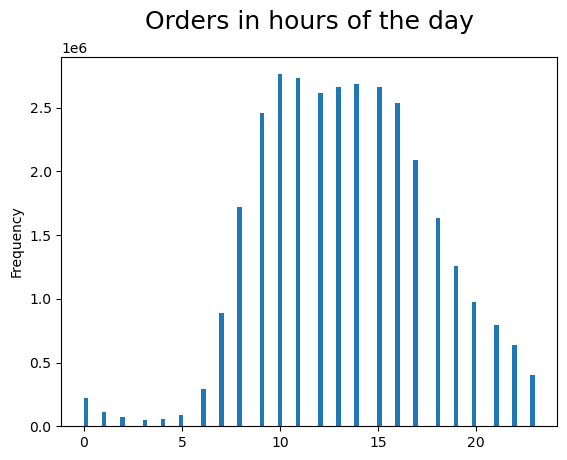

In [23]:
# Create a histogram of the “order_hour_of_day” column

hist_ord_hour_day = df_ords_prods_custs['order_hour_of_day'].plot.hist(bins = 100)
plt.title('Orders in hours of the day', fontsize = 18, pad=20)

The above histogram displays the number of hours in a day (0 - 23 hours) as well as the total number of orders placed for each hour(in millions).

Most orders are between 9 and 17 o'clock 

## 8. Create a bar chart from the “loyalty_flag” column.

The marketing team is curious about the distribution of orders among customers in terms of loyalty.

Text(0, 0.5, 'Frequency (in millions)')

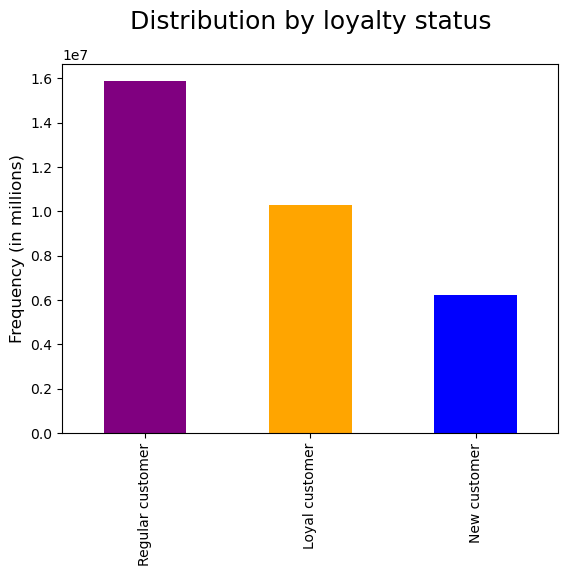

In [24]:
bar_loyalty = df_ords_prods_custs['loyalty_flag'].value_counts().plot.bar(color=['purple', 'orange', 'blue'])
plt.title('Distribution by loyalty status', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)

## 9. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

Hint: To check this, you need to use an accurate sample for your line chart!

In [25]:
# Creating a subset df_

df_order_hour_of_day_prices = small[['order_hour_of_day', 'prices']]

In [26]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


Text(0.5, 1.0, 'Spending habits in hours of the day')

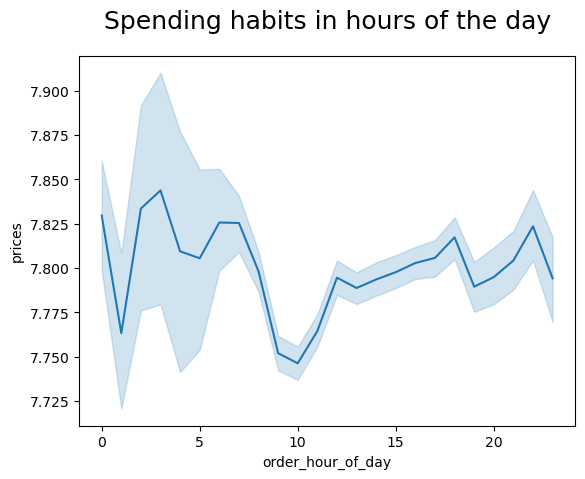

In [27]:
# Creating a line chart of the 'order_hour_of_day' and 'prices' columns 

line_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day', y = 'prices')
plt.title('Spending habits in hours of the day', fontsize = 18, pad=20)

## 10. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

In a markdown cell beneath your line chart, describe what the line chart shows.

In [28]:
# Creating a subset df_

df_age_dependents = small[['age','number_dependents']]

In [29]:
df_age_dependents.head()

,age,number_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


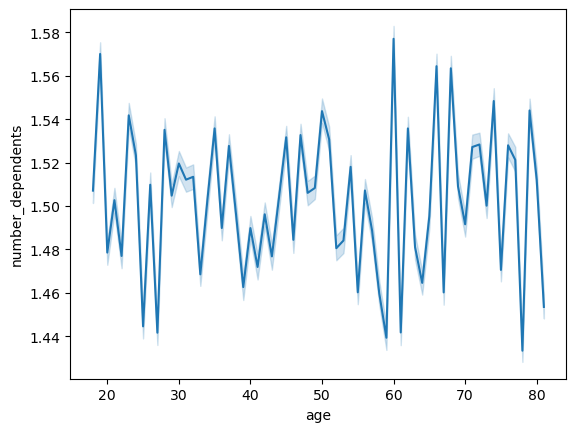

In [30]:
# Creating a line chart of the 'age' and 'number_dependents' columns 

line_age_dependents = sns.lineplot(data = df_age_dependents, x = 'age', y = 'number_dependents')

The above line chart shows the number of dependents based on age. Due to the chaos in that chart, it is not possible to focus on specific clients.

## 11. Explore whether there’s a connection between age and spending power (income).

To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [31]:
# Creating a subset df_

df_age_income = small[['age','income']]

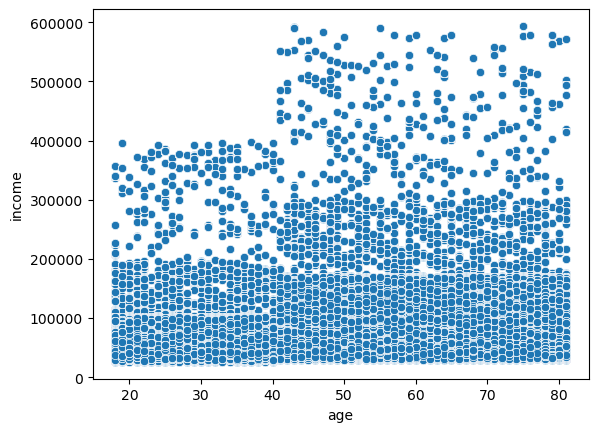

In [32]:
# Create a scatterplot of the 'age' and 'income' columns

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

The scatterplot shows the connection between instacart customers' age and income. The scatterplot highlights the following significant points:
1. There is a significant number of customers of all ages who earn up to 200,000 USD.
2. Customers over the age of 40 earn more money (up to 600,000 USD).


In conclusion, instacart customers aged 40 and up may spend more due to higher income earnings.

## 12. Export your visualizations as “.png” files

In [33]:
bar_2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_ord_dow.png'))

In [34]:
hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'hist_prices2.png'))

In [35]:
scatterplot_prices.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatterplot_prices.png'))

In [36]:
line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_chart.png'))

In [37]:
hist_ord_hour_day.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'hist_ord_hour_day.png'))

In [38]:
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty.png'))

In [39]:
line_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_order_hour_of_day_prices.png'))

In [40]:
line_age_dependents.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_age_dependents.png'))

In [41]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatterplot_age_income.png'))